# About The Dataset
- providing cities with rental bikes has become vital for comfort and enhancing mobility, so predicting of the pressure on bikes or the bike's count at each hour required for stable supply of rental bikes.  
- the data is from: https://archive.ics.uci.edu/dataset/560/seoul+bike+sharing+demand

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler
from tensorflow import keras

In [3]:
cols= ['bike_count', 'hour', 'temp', 'humidity', 'wind_speed', 'visibility', 'dew_pt_temp', 'radiation', 'rain', 'snow', 'functional']
df= pd.read_csv(r'Datasets\SeoulBikeData.csv').drop(columns=['Date', 'Holiday', 'Seasons'], axis=1)


In [10]:
df.head()

,Rented Bike Count,Hour,Temperature,Humidity,Wind speed,Visibility (10m),Dew point temperature,Solar Radiation,Rainfall(mm),Snowfall (cm),Functioning Day
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [4]:
df.columns= cols
df.head()

,bike_count,hour,temp,humidity,wind_speed,visibility,dew_pt_temp,radiation,rain,snow,functional
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Yes
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Yes
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Yes
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Yes
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Yes


In [5]:
# Convert 'functional' column to binary values
df['functional'] = df['functional'].map({'Yes': 1, 'No': 0})
# or (df['functional']== 'Yes').astype(int)

In [23]:
df.functional.value_counts()

functional
1    8465
0     295
Name: count, dtype: int64

I will focus on one hour specifically

In [6]:
df= df[df['hour']== 12]
df.drop(columns=['hour'], inplace=True)

In [7]:
df.head()

,bike_count,temp,humidity,wind_speed,visibility,dew_pt_temp,radiation,rain,snow,functional
12,449,1.7,23,1.4,2000,-17.2,1.11,0.0,0.0,1
36,479,4.3,41,1.3,1666,-7.8,1.09,0.0,0.0,1
60,333,5.8,85,1.7,349,3.4,0.43,0.0,0.0,1
84,393,-0.3,38,4.8,1823,-12.9,1.11,0.0,0.0,1
108,321,-2.3,25,0.0,1962,-19.7,0.00,0.0,0.0,1


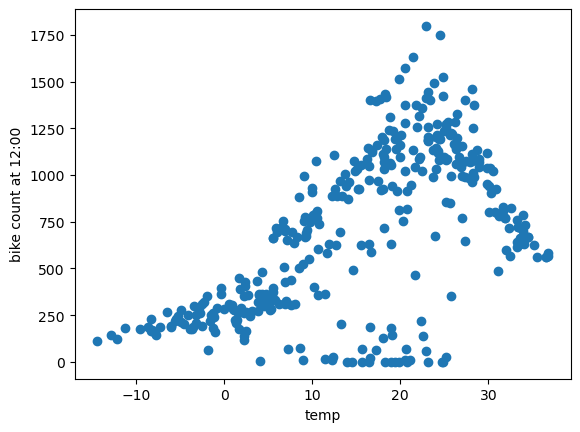

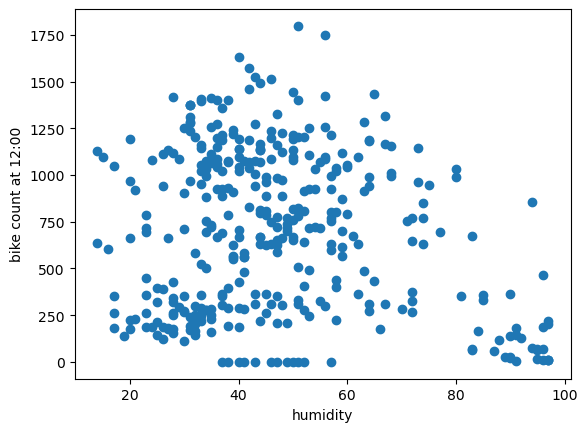

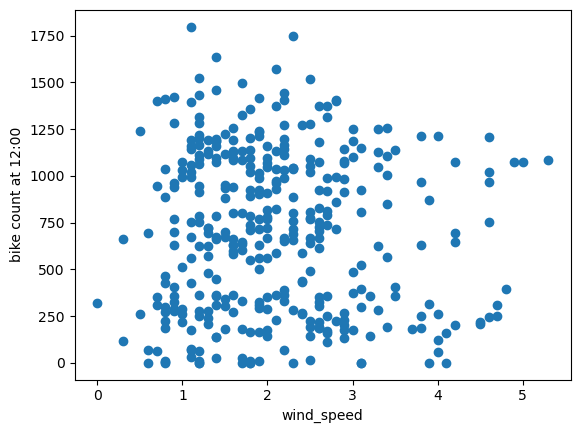

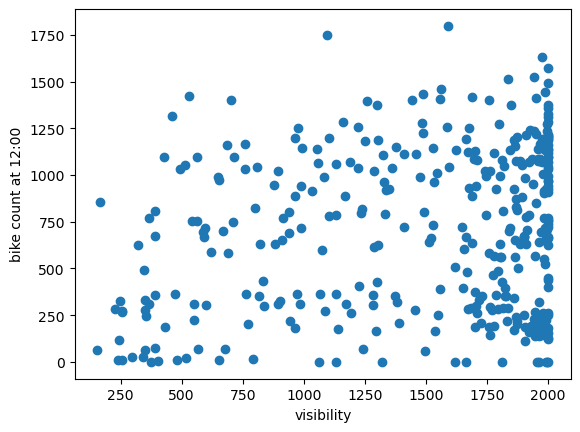

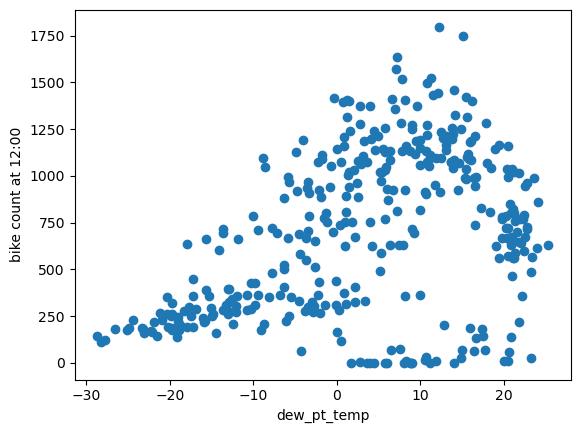

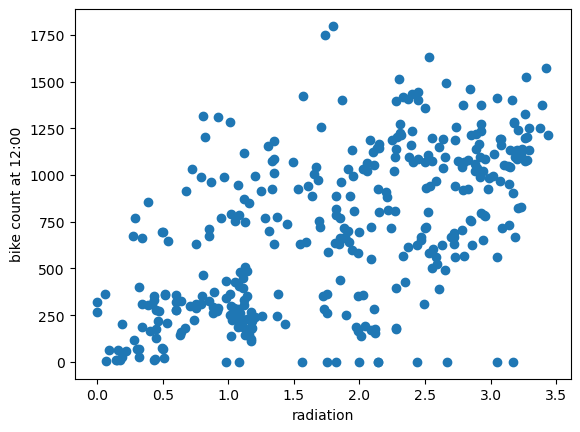

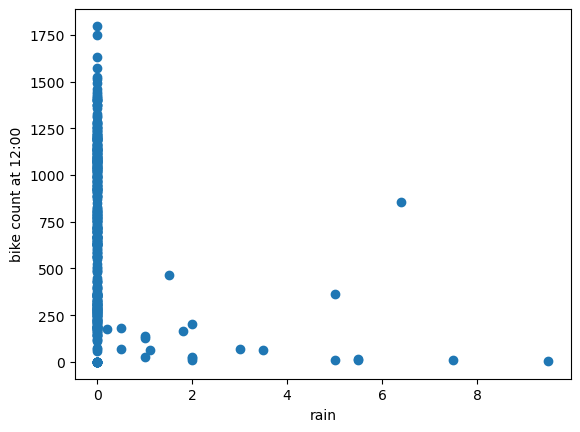

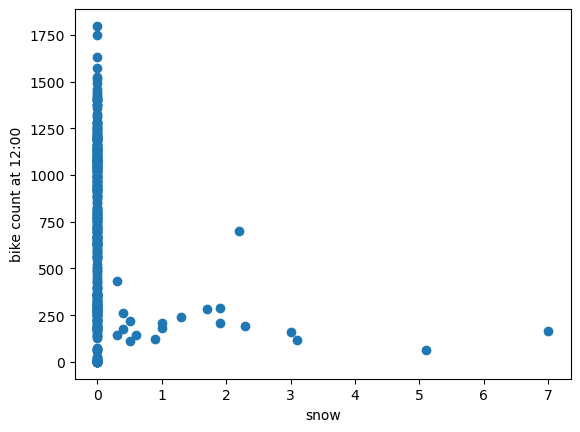

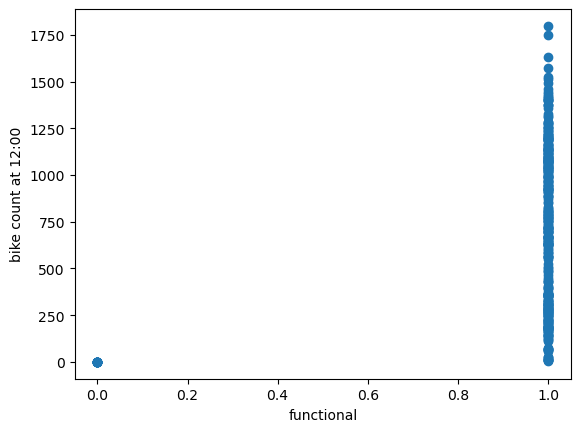

In [27]:
for label in df.columns[1:]:
    plt.scatter(df[label], df['bike_count'])
    plt.xlabel(label)
    plt.ylabel('bike count at 12:00')
    plt.show()

I am going to build a linear model first, so I am going to get rid of the features that look like they have no relation to the count of bike rented

In [8]:
df= df.drop(columns= ['wind_speed', 'visibility', 'functional'], axis= 1)
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


### Train, Valid, Test Split

In [10]:
train, valid, test = np.split(df.sample(frac=1), [int(.6*len(df)), int(.8*len(df))])

d:\Programing\Anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [11]:
# Function to get X and y from a dataframe
def get_xy(dataframe, y_label, X_labels=None):
    dataframe = dataframe.copy()
    if X_labels is None:
        X = dataframe[[c for c in dataframe.columns if c!= y_label]].values
    else:
        if len(X_labels) ==1:
            X = dataframe[X_labels[0]].values.reshape(-1,1)
        else:
            X= dataframe[X_labels].values
    
    y= dataframe[y_label].values.reshape(-1,1)

    data = np.hstack((X, y))

    return data, X, y

Simple linear regression

In [12]:
d, X_train_temp, y_train_temp = get_xy(train, 'bike_count', X_labels= ['temp'])
d, X_valid_temp, y_valid_temp = get_xy(valid, 'bike_count', X_labels= ['temp'])
d, X_test_temp, y_test_temp = get_xy(test, 'bike_count', X_labels= ['temp'])


#d, X_train, y_train = get_xy(train, 'bike_count', X_labels= 'dew_pt_temp')
#d, X_train, y_train = get_xy(train, 'bike_count', X_labels= 'radiation')

In [13]:
from sklearn.linear_model import LinearRegression

temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

temp_reg.score(X_valid_temp, y_valid_temp)

0.30097188350889237

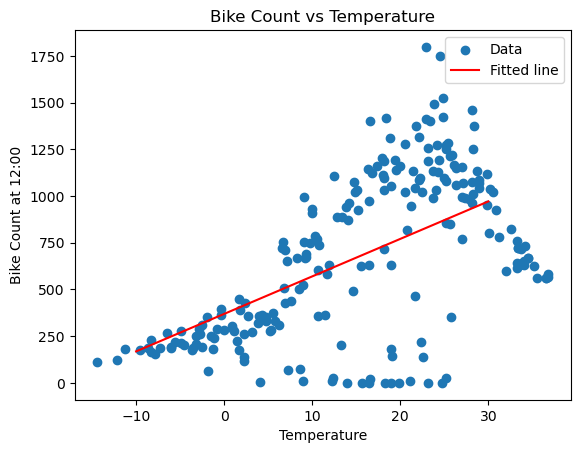

In [32]:
# Visualizing the single feature (temp) regression on bike count
plt.scatter(X_train_temp, y_train_temp, label='Data')
x= np.linspace(-10, 30, 100).reshape(-1, 1)
plt.plot(x, temp_reg.predict(x), label=('Fitted line'), color='red')
plt.xlabel('Temperature')
plt.ylabel('Bike Count at 12:00')
plt.title('Bike Count vs Temperature')
plt.legend()
plt.show()

### Muliable Linear Regression

In [14]:
d, X_train, y_train = get_xy(train, 'bike_count', X_labels= ['temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain', 'snow'])
d, X_valid, y_valid = get_xy(valid, 'bike_count', X_labels= [ 'temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain', 'snow'])
d, X_test, y_test = get_xy(test, 'bike_count', X_labels= [ 'temp', 'humidity', 'dew_pt_temp', 'radiation', 'rain', 'snow'])

In [15]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [17]:
lr_model.score(X_valid, y_valid)

0.49816999413093077

### Regressor with a Neural Net

In [22]:
temp_normalizer = keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

d:\Programing\Anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [40]:
reg_nn = keras.Sequential([
    temp_normalizer,
    keras.layers.Dense(1)
])

reg_nn.compile(optimizer=keras.optimizers.Adam(.1), loss='mean_squared_error')


In [41]:
history = reg_nn.fit(X_train_temp.reshape(-1), y_train_temp, epochs=1000, validation_data=(X_valid_temp, y_valid_temp), verbose=0)

In [26]:
def plot_history(history):
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.title('Loss over epochs')
    plt.ylabel('MSE')
    plt.legend()
    plt.grid()
    plt.show()

Comparing single neuron output with the linear regression on the feature temp just for the fun of it.

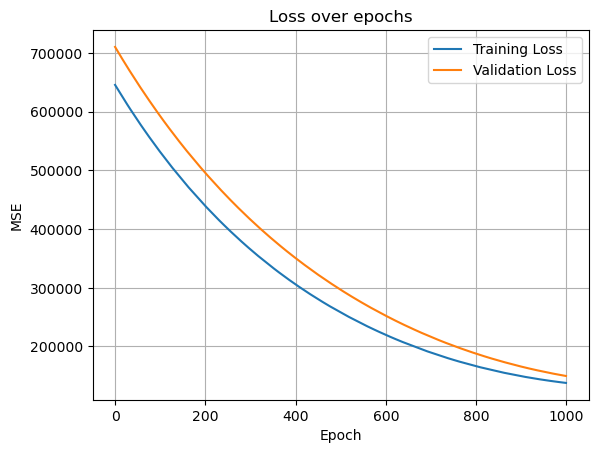

In [42]:
plot_history(history)

1/4 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/stepWARNING:tensorflow:6 out of the last 12 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x000001FF8794F4C0> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step


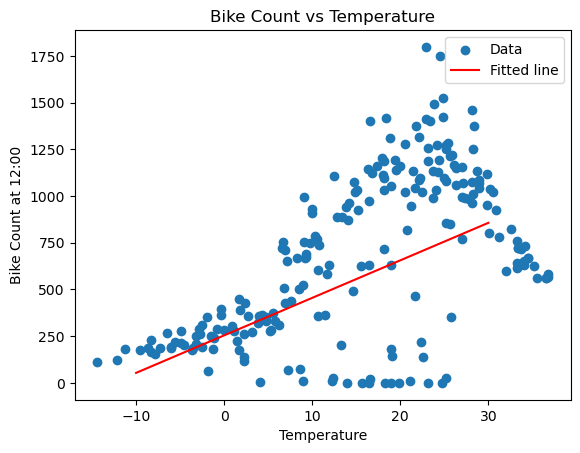

In [43]:
plt.scatter(X_train_temp, y_train_temp, label='Data')
x= np.linspace(-10, 30, 100).reshape(-1, 1)
plt.plot(x, reg_nn.predict(x), label=('Fitted line'), color='red')
plt.xlabel('Temperature')
plt.ylabel('Bike Count at 12:00')
plt.title('Bike Count vs Temperature')
plt.legend()
plt.show()

OK, now with all the feartures not just temp.

In [ ]:
normalizer = keras.layers.Normalization(input_shape=(6,), axis=None)
normalizer.adapt(X_train)

reg_all_nn = keras.Sequential([
    temp_normalizer,
    keras.layers.Dense(1)
])

reg_all_nn.compile(optimizer=keras.optimizers.Adam(.1), loss='mean_squared_error')


In [47]:
history = reg_all_nn.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid), verbose=0)

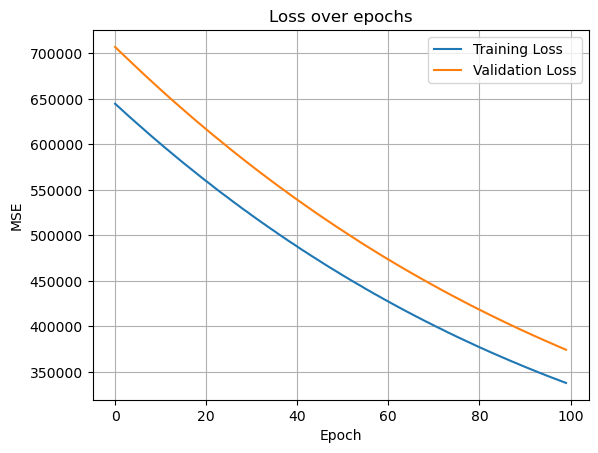

In [48]:
plot_history(history)

### Neural Net

In [ ]:
normalizer = keras.layers.Normalization(input_shape=(6,), axis=None)
normalizer.adapt(X_train)

nn_model = keras.Sequential([
    normalizer,
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='relu')
])

nn_model.compile(optimizer= keras.optimizers.Adam(.001), loss= 'mean_squared_error')

d:\Programing\Anaconda3\Lib\site-packages\keras\src\layers\preprocessing\tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [52]:
history = nn_model.fit(X_train, y_train, epochs= 1000, validation_data=(X_valid, y_valid), verbose= 0)

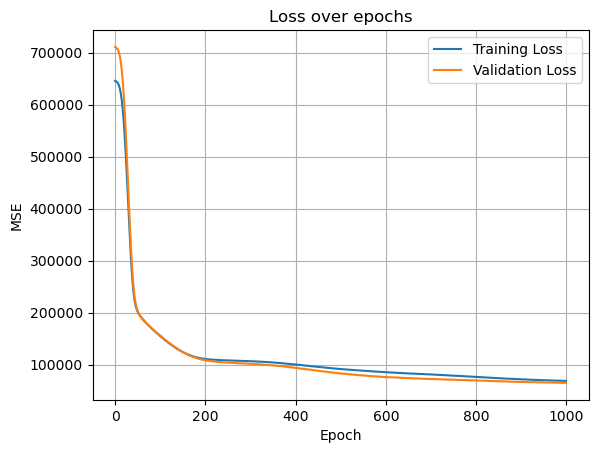

In [53]:
plot_history(history)

In [ ]:
plt.scatter(X_train_temp, y_train_temp, label='Data')
x= np.linspace(-10, 30, 100).reshape(-1, 1)
plt.plot(x, nn_model.predict(x), label=('Fitted line'), color='red')
plt.xlabel('Temperature')
plt.ylabel('Bike Count at 12:00')
plt.title('Bike Count vs Temperature')
plt.legend()
plt.show()

In [73]:
print(X_train.shape)
print(y_train.shape)


(219, 6)
(219, 1)


In [ ]:
normalizer = keras.layers.Normalization(input_shape=(6,), axis=-1)
normalizer.adapt(X_train)

nn_model = keras.Sequential([
    normalizer,
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1, activation='relu') # relu activation for regression output without negative values 
])

nn_model.compile(optimizer= keras.optimizers.Adam(.001), loss= 'mean_squared_error')

In [76]:
history = nn_model.fit(X_train, y_train, epochs= 1000, validation_data=(X_valid, y_valid), verbose= 0)

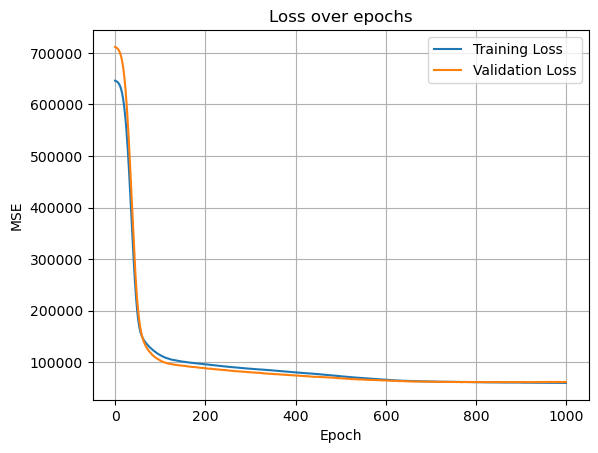

In [77]:
plot_history(history)

now I want to measure the score. (how good each model compared to the other)

In [79]:
# Calulate the mean squared error for the linear regression and neural network model

y_predict_lr = lr_model.predict(X_test)
y_predict_nn = nn_model.predict(X_test)


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


In [81]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, y_predict_lr), mean_squared_error(y_test, y_predict_nn)


(85702.41100228914, 58914.29135837694)

In [ ]:
# or
def MSE(y_pred, y_true):
    return np.mean((y_pred - y_true)**2)

MSE(y_predict_lr, y_test), MSE(y_predict_nn, y_test) 
# the MSE for the linear regression model is higher than the neural network model, indicating that the neural network model performs better on this dataset.

(85702.41100228914, 58914.29135837694)

Visualizing whether the predicted values match the true values for both models.


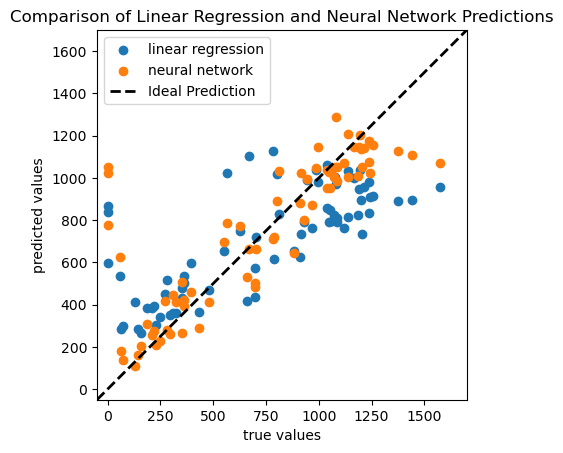

In [ ]:

ax = plt.axes(aspect='equal') # ideally the predicted values should be equal to the true values so the plot should be a straight line
plt.scatter(y_test, y_predict_lr, label= 'linear regression')
plt.scatter(y_test, y_predict_nn, label= 'neural network')
plt.xlabel('true values')
plt.ylabel('predicted values')
plt.title('Comparison of Linear Regression and Neural Network Predictions')

lims = [-50,1700]
plt.xlim(lims)
plt.ylim(lims) 
plt.plot(lims, lims, 'k--', lw=2, label='Ideal Prediction') # ideal prediction line
plt.legend()
plt.show()

using neural networks will result in better predictions in this case.